<a href="https://colab.research.google.com/github/aakankshch/CNN/blob/main/Potato_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install split-folders

In [ ]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import splitfolders

import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Splitting the folders for train,val and test
input_path='/content/drive/MyDrive/data/Potato Disease Classfication'
split_path='/content/drive/MyDrive/data/PDC Split Folders'

In [ ]:
splitfolders.ratio(input_path,output=split_path, seed=1333, ratio=(0.8,0.1,0.1))

Copying files: 2152 files [01:08, 31.51 files/s]


In [ ]:
IMAGE_SIZE = 256
CHANNELS = 3
BATCH_SIZE=32

In [ ]:
#Setting up the Image Data Generator for Data Augmentation
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)

In [ ]:
#Generate batches of image data for training
train_generator = train_datagen.flow_from_directory(
        f'{split_path}/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse",
)

Found 1721 images belonging to 3 classes.


In [ ]:
#Number of Batches
len(train_generator)

54

In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
for image_batch, label_batch in train_generator:
    print(image_batch.shape) #Batch Size,Image Size, No, of Channels
    break

(32, 256, 256, 3)


In [ ]:
for image_batch, label_batch in train_generator:
    print(image_batch[0].shape) #Shape of 1st image in the batch
    break

(256, 256, 3)


In [ ]:
batch_count=0
for image_batch, label_batch in train_generator:
    print(label_batch) #labels in the batch
    batch_count=batch_count+1

    if batch_count >= 5:
        break

[1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 2. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 0. 1.]
[1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 2. 1. 1. 0. 0. 1. 0. 1. 1. 0. 2. 1.
 0. 1. 1. 0. 1. 0. 1. 0.]
[1. 0. 2. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 0.]
[0. 0. 0. 0. 1. 1. 2. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 2. 1. 1. 2. 1. 1. 1. 0.]
[0. 1. 1. 0. 2. 1. 1. 1. 1. 0. 2. 0. 1. 0. 2. 0. 0. 0. 1. 2. 0. 1. 1. 1.
 0. 0. 1. 2. 1. 1. 1. 0.]


In [ ]:
for image_batch, label_batch in train_generator:
    print(label_batch) #labels in the batch

    break

[0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 2. 1. 0. 2. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0.]


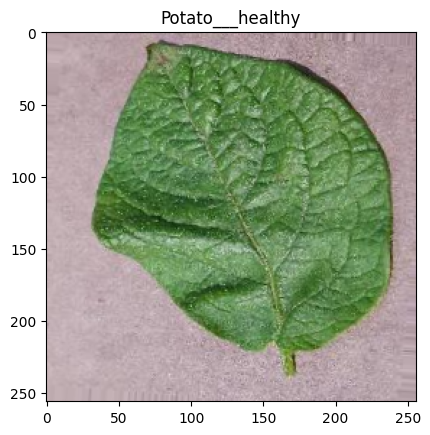

In [ ]:
for image_batch,label_batch in train_generator:
    plt.imshow(image_batch[0])
    plt.title(class_names[int(label_batch[0])])
    break


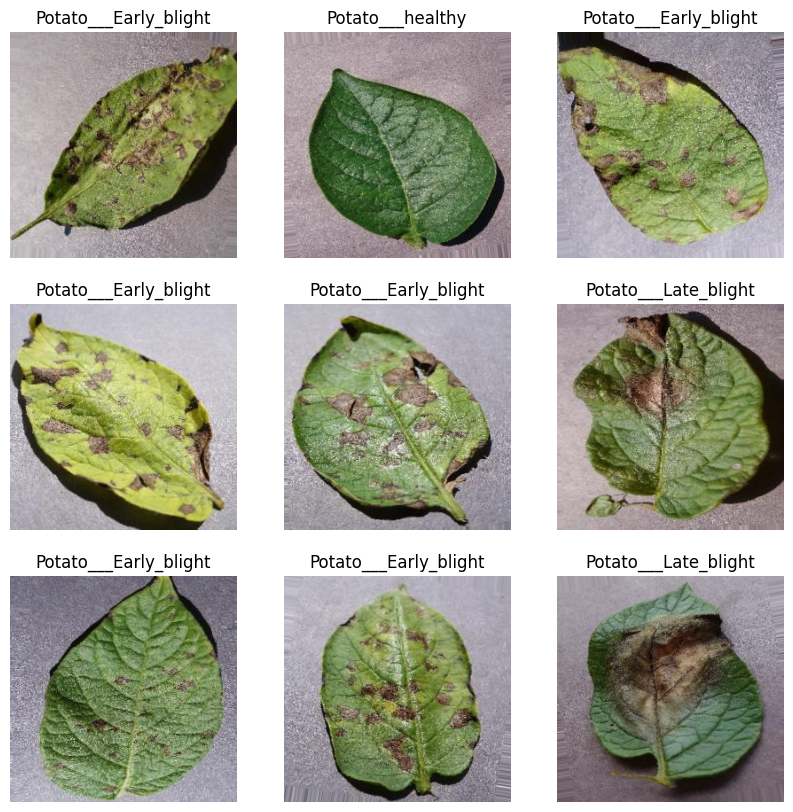

In [ ]:
#Displaying More images
batch_count=0
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image_batch[i])
        plt.title(class_names[int(labels_batch[i])])
        plt.axis("off")
    batch_count+=1
    if batch_count >= 1:
        break

In [ ]:
#Setting up the Image Data Generator and generating batches of image data for validation
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        f'{split_path}/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [ ]:
#Generating batches of image data for test
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        f'{split_path}/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,InputLayer

In [ ]:
#Building the Model
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model =Sequential()
model.add(InputLayer(input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(n_classes,activation='Softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model_fit = model.fit(train_generator,
                      steps_per_epoch=len(train_generator),
                      batch_size=32,
                      validation_data=validation_generator,
                      validation_steps=len(validation_generator),
                      verbose=1,
                      epochs=20,
)

Epoch 1/20
54/54 [==============================] - 310s 6s/step - loss: 0.9169 - accuracy: 0.5183 - val_loss: 0.8612 - val_accuracy: 0.4698
Epoch 2/20
54/54 [==============================] - 305s 6s/step - loss: 0.7310 - accuracy: 0.6793 - val_loss: 0.6146 - val_accuracy: 0.7070
Epoch 3/20
54/54 [==============================] - 306s 6s/step - loss: 0.4368 - accuracy: 0.8187 - val_loss: 0.2769 - val_accuracy: 0.8884
Epoch 4/20
54/54 [==============================] - 298s 5s/step - loss: 0.3290 - accuracy: 0.8623 - val_loss: 0.2619 - val_accuracy: 0.8884
Epoch 5/20
54/54 [==============================] - 303s 6s/step - loss: 0.2394 - accuracy: 0.9053 - val_loss: 0.1800 - val_accuracy: 0.9349
Epoch 6/20
54/54 [==============================] - 300s 6s/step - loss: 0.2392 - accuracy: 0.9041 - val_loss: 0.2232 - val_accuracy: 0.9163
Epoch 7/20
54/54 [==============================] - 308s 6s/step - loss: 0.2195 - accuracy: 0.9128 - val_loss: 0.2030 - val_accuracy: 0.9209
Epoch 8/20
54

In [ ]:
#Evaluate the model
scores=model.evaluate(test_generator)

7/7 [==============================] - 21s 3s/step - loss: 0.0681 - accuracy: 0.9769


In [ ]:
scores #loss,accuracy values

[0.0680793821811676, 0.9768518805503845]

**Plotting the accuracy and loss ROC Curves**

In [ ]:
model_fit.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [ ]:
model_fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
#Returns a list of accuracies for the first 5 epochs
model_fit.history['accuracy'][:5]

[0.5183033347129822,
 0.67925626039505,
 0.8187100291252136,
 0.8622893691062927,
 0.9052876234054565]

In [ ]:
#Number of Epochs
len(model_fit.history['accuracy'])

20

In [ ]:
#Accuracy and Loss Curves
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']

loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

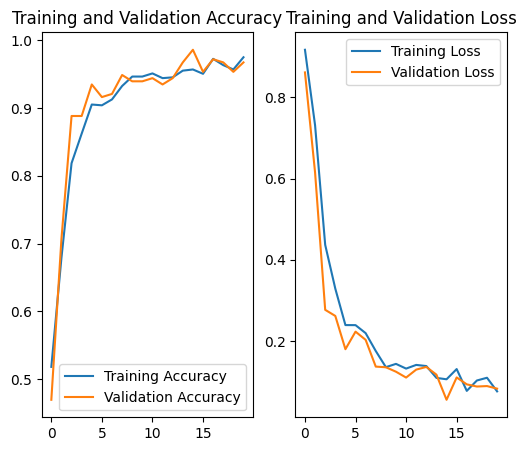

In [ ]:
EPOCHS=20
plt.figure(figsize=(6,5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
Actual label: Potato___Late_blight
1/1 [==============================] - 1s 1s/step
Predicted label: Potato___Late_blight


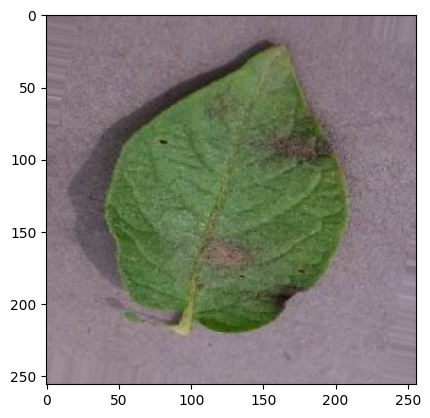

In [ ]:
#Predicting 1 image
for images_batch, labels_batch in test_generator: #Taking the first batch of test dataset

    first_image = images_batch[0] #frist image of the batch
    first_label = int(labels_batch[0])

    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])
    break

In [ ]:
#Predict Images in a batch
def predict(model, img):
    img_array = keras.preprocessing.image.img_to_array(images[i]) #Converting the images to arrays
    img_array = tf.expand_dims(img_array, 0) #Creating a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 63ms/step


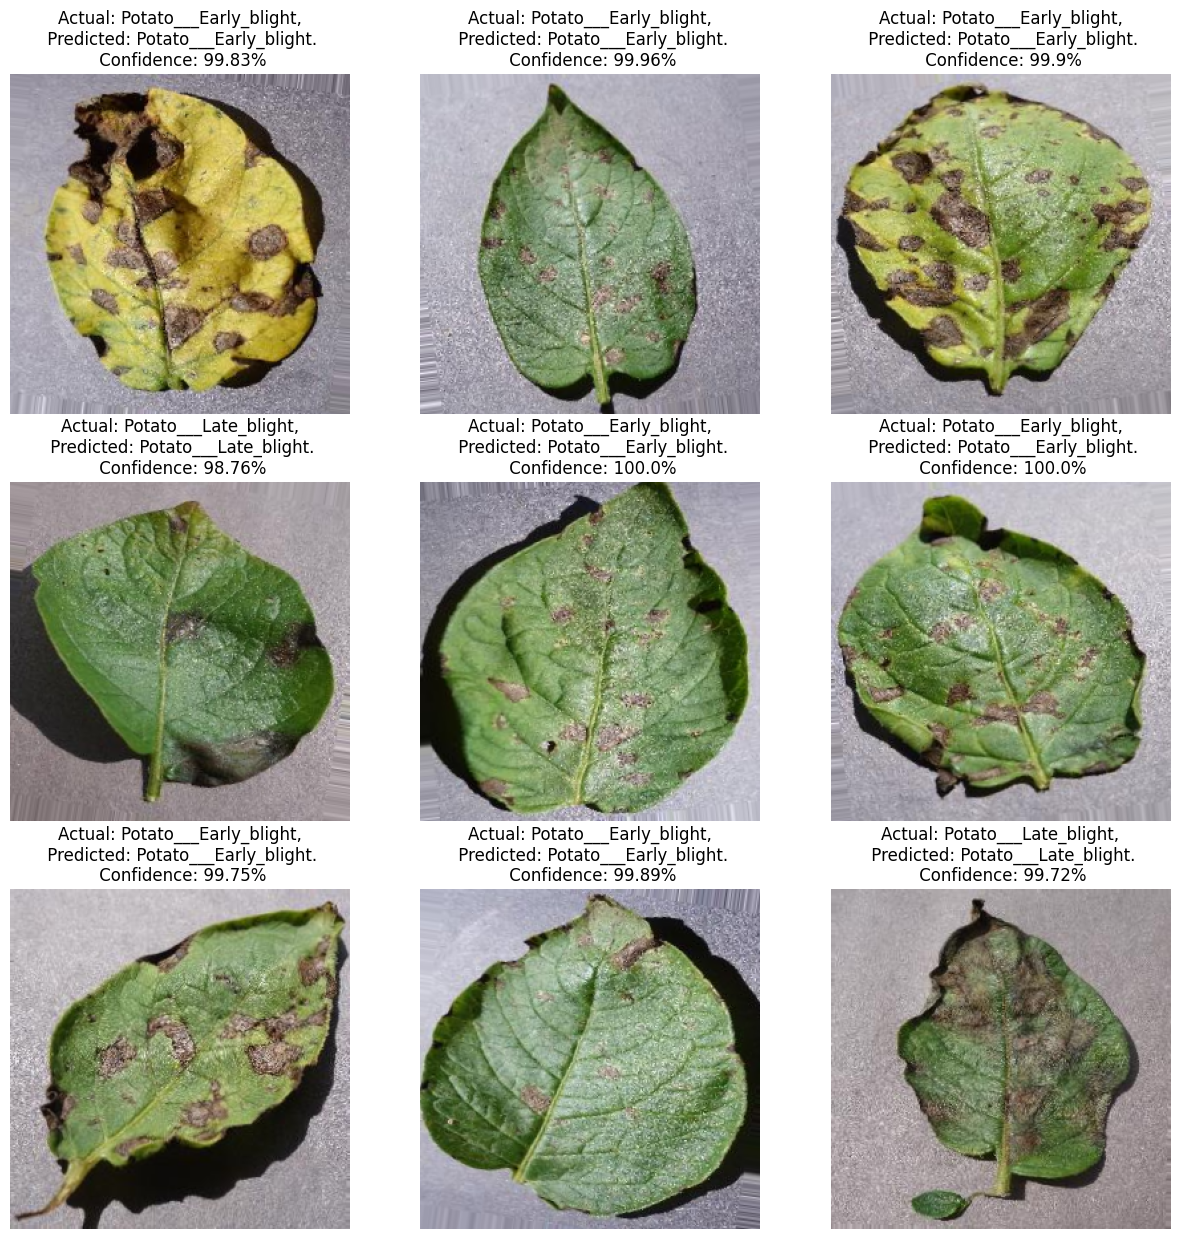

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

In [ ]:
#Saving the model
model.save('/content/drive/MyDrive/data/potatoes.keras')